### 延迟
- 3B fp16
  - DeepSpeed: 916.154926776886, 814.4085965156555, 868.8265690803528
  - DeepSpeed w/o inject: 896.9913477897644, 1016.3874826431274, None
  - Transformers Auto: 878.3132123947144, 809.2072563171387, 894.383448600769

- 3B fp32
  - DeepSpeed: 780.5555982589722, 740.2510809898376, 764.7669162750244
  - DeepSpeed w/o inject: 763.3138751983643, 964.3049464225769, 1088.4784288406372
  - Transformers Auto: 733.0155053138733, 741.7419366836548, 807.8240022659302

- 1.5B fp16
  - DeepSpeed: 760.0588321685791, 698.3302083015442, 702.6920557022095
  - DeepSpeed w/o inject: 795.7499661445618, 948.9905571937561, None
  - Transformers Auto: 757.1995749473572, 667.3153986930847, 660.6463441848755

- 1.5B fp32
  - DeepSpeed: 637.739040851593, 664.2602643966675, 673.9609489440918
  - DeepSpeed w/o inject: 637.2022547721863, 827.5976257324219, 871.9142813682556
  - Transformers Auto: 648.510329246521, 641.0158257484436, 644.6214914321899

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

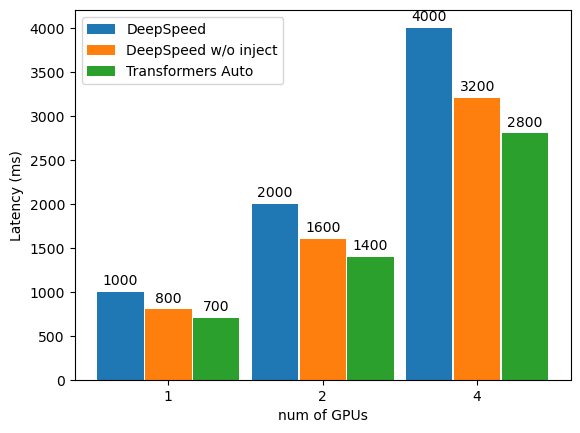

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.font_manager as fm

# # 设置中文字体
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 示例数据
gpu_counts = [1, 2, 4]
DeepSpeed = [1000, 2000, 4000]  # ms
DeepSpeed_noinject = [800, 1600, 3200]  # ms
Transformers = [700, 1400, 2800]  # ms

# 设置柱状图的位置和宽度
x = np.arange(len(gpu_counts))
width = 0.3  # 减小柱状图的宽度以增加间隙

# 创建柱状图
fig, ax = plt.subplots()
bars1 = ax.bar(x, DeepSpeed, width, label='DeepSpeed')  # 增加额外的偏移
bars2 = ax.bar(x + width + 0.01, DeepSpeed_noinject, width, label='DeepSpeed w/o inject')
bars3 = ax.bar(x - width - 0.01, Transformers, width, label='Transformers Auto')  # 增加额外的偏移

# 添加标签和标题
ax.set_xlabel('GPU数量')
ax.set_ylabel('延迟 (ms)')
ax.set_title('不同GPU数量下的延迟（1.5B fp16）')
ax.set_xticks(x)
ax.set_xticklabels(gpu_counts)
ax.legend()

# 显示数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# 显示图形
plt.show()
plt.savefig('latency.svg', format='svg')

In [33]:
a=33.68382356937298
b=760.0588321685791
c=35.43560729217529
print(a*b/c)

722.4847988075351


### tokens 吞吐量
- 3B fp16 
  - DeepSpeed: 572.2906638996919, 737.9317491787197, 652.4386984076119
  - DeepSpeed w/o inject: 612.2936517049353, 573.0782586674122, None

- 3B fp32
  - DeepSpeed: 752.1564531364462, 820.2778617292344, 777.6707505350489
  - DeepSpeed w/o inject: 792.8642663708744, 599.2223721104262, 495.58873725760355

- 1.5B fp16
  - DeepSpeed: 722.4847988075351, 658.5900266420465, 855.2054786810484
  - DeepSpeed w/o inject: 654.4298672171368, 528.0473442346853, None

- 1.5B fp32
  - DeepSpeed: 984.320502576515, 913.5977268966604, 873.776493774252
  - DeepSpeed w/o inject: 977.9921053933676, 718.1848953996531, 663.9328240093703

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.font_manager as fm

# # 设置中文字体
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 示例数据
gpu_counts = [1, 2, 4]
DeepSpeed = [1000, 2000, 4000]  # tokens/s
DeepSpeed_noinject = [800, 1600, 3200]  # tokens/s

# 设置柱状图的位置和宽度
x = np.arange(len(gpu_counts))
width = 0.4  # 减小柱状图的宽度以增加间隙

# 创建柱状图
fig, ax = plt.subplots()
bars1 = ax.bar(x, DeepSpeed, width, label='DeepSpeed')  # 增加额外的偏移
bars2 = ax.bar(x + width + 0.01, DeepSpeed_noinject, width, label='DeepSpeed w/o inject')

# 添加标签和标题
ax.set_xlabel('GPU数量')
ax.set_ylabel('Token 吞吐量 (tokens/s)')
ax.set_title('不同GPU数量下的Token吞吐量（3B fp32）')
ax.set_xticks(x)
ax.set_xticklabels(gpu_counts)
ax.legend()

# 显示数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# 显示图形
plt.show()
plt.savefig('token.svg', format='svg')

722.4847988075351


### 利用率
- 3B fp16
  - DeepSpeed: [40.65625], [32.75625, 22.449], [20.46625, 19.70325, 19.55975, 30.53775]
  - DeepSpeed w/o inject: [30.2675], [35.17725, 44.25875], None
  - Transformers Auto: [31.19525], [23.62025, 33.7605], [30.31275, 17.21475, 18.63, 18.52625]

- 3B fp32
  - DeepSpeed:  [49.21725], [35.45525, 53.018], [32.7825, 34.20975, 50.395, 34.11325]
  - DeepSpeed w/o inject: [50.22075], [49.051, 39.955], [40.79325, 56.06525, 79.3725, 78.484]
  - Transformers Auto: [52.8195], [35.94175, 53.0165], [29.8335, 29.3205, 47.831, 28.5465]

- 1.5B fp16
  - DeepSpeed: [27.3295], [25.61125, 15.35], [14.15725, 14.8065, 15.29825, 24.678]
  - DeepSpeed w/o inject: [22.1765], [30.177, 37.3835], None
  - Transformers Auto: [33.25], [15.56675, 25.7305], [19.44225, 17.01325, 26.49825, 15.4055]
- 1.5B fp32
  - DeepSpeed: [36.18175], [19.4525, 34.9135], [19.30325, 34.464, 18.452, 19.17075]
  - DeepSpeed w/o inject: [36.13825], [41.901, 32.5005], [54.184, 30.7895, 78.76525, 77.0065]
  - Transformers Auto: [35.721], [20.3455, 35.87175], [21.275, 19.30725, 36.01275, 19.18225]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.font_manager as fm

# # 设置中文字体
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

# 示例数据
gpu_counts = [1, 2, 4]
DeepSpeed_ = [1000, 2000, 4000]
DeepSpeed_noinject_ = [800, 1600, 3200] 
Transformers_ = [700, 1400, 2800]

DeepSpeed = []
DeepSpeed_noinject = []
Transformers = []

for i in range(len(gpu_counts)):
    DeepSpeed.append(sum(DeepSpeed_[i])/len(DeepSpeed_[i])*1.42)
    DeepSpeed_noinject.append(sum(DeepSpeed_noinject_[i])/len(DeepSpeed_noinject_[i])*1.42)
    Transformers.append(sum(Transformers_[i])/len(Transformers_[i])*1.42)

# 设置柱状图的位置和宽度
x = np.arange(len(gpu_counts))
width = 0.3  # 减小柱状图的宽度以增加间隙

# 创建柱状图
fig, ax = plt.subplots()
bars1 = ax.bar(x, DeepSpeed, width, label='DeepSpeed')  # 增加额外的偏移
bars2 = ax.bar(x + width + 0.01, DeepSpeed_noinject, width, label='DeepSpeed w/o inject')
bars3 = ax.bar(x - width - 0.01, Transformers, width, label='Transformers Auto')  # 增加额外的偏移

# 添加标签和标题
ax.set_xlabel('GPU数量')
ax.set_ylabel('TFLOPS')
ax.set_title('不同GPU数量下的计算吞吐量（3B fp16）')
ax.set_xticks(x)
ax.set_xticklabels(gpu_counts)
ax.legend()

# 显示数值标签
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# 显示图形
plt.show()
plt.savefig('compute.svg', format='svg')

### 显存占用
- 0.5B: 2501 2579
- 1.5B: 6154 6815
- 3B: 9224 12765
- 7B: 18310 24576

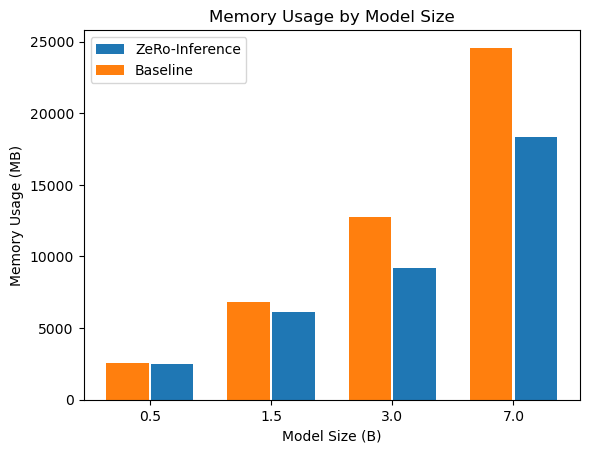

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 数据解析
data = """0.5B 2501 2579
1.5B 6154 6815
3B 9224 12765
7B 18310 24576"""

# # 设置中文字体
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用黑体
# plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号

lines = data.strip().split('\n')
model_sizes = [float(line.split()[0].replace('B', '')) for line in lines]
zero_inference_memory = [int(line.split()[1]) for line in lines]
baseline_memory = [int(line.split()[2]) for line in lines]

# 绘制柱状图
x = np.arange(len(model_sizes))
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2+0.01, zero_inference_memory, width, label='ZeRo-Inference')
rects2 = ax.bar(x - width/2-0.01, baseline_memory, width, label='Baseline')

# 添加标签、标题和图例
ax.set_xlabel('模型规模 (B)')
ax.set_ylabel('显存占用 (MB)')
ax.set_title('显存占用随模型规模变化')
ax.set_xticks(x)
ax.set_xticklabels(model_sizes)
ax.legend()

# 显示图形
plt.show()